## 1. Problembeschreibung 

In diesem Thema wird eine klare Definition des zugrunde liegenden Problems vorgenommen. Dabei wird erläutert, worin die zu lösende Aufgabe besteht und welche Art von Problem (Klassifikation oder Regression) behandelt wird. Zudem wird die Relevanz und der Anwendungskontext des Problems dargestellt, um den praktischen Nutzen und die Bedeutung des Themas zu verdeutlichen. Abschließend werden die erwarteten Herausforderungen beschrieben, die im Rahmen der Umsetzung und Analyse eine zentrale Rolle spielen.

## 1.1 Audioakquisition und Projektziel

Für dieses Projekt wurden Audiodaten von mehreren Studierenden erhoben. Jede Studierende und jeder Studierende hatte die Aufgabe, verschiedene Maschinen akustisch zu erfassen und die Aufnahmen anschließend korrekt zu beschriften. Die Auswahl der Maschinen war auf eine festgelegte Anzahl begrenzt, die im weiteren Verlauf näher erläutert wird.

Ziel des Projekts ist die Entwicklung eines KI-Modells, das anhand der aufgenommenen Geräusche zuverlässig erkennen kann, um welche Maschine es sich handelt.

Jede Aufnahme hatte eine Dauer von etwa zwei Minuten. Diese konnte entweder vollständig einer einzelnen Maschine zugeordnet sein oder auf mehrere Maschinen verteilt werden. Nach Abschluss der Aufnahmen wurden die Audiodateien zusammen mit den zugehörigen Labels eingereicht.

Insgesamt wurden die Daten von etwa zehn bis zwölf Studierenden gesammelt und in einem gemeinsamen DataFrame zusammengeführt, der als Grundlage für die weitere Analyse und Modellierung dient.

## 1.2 Anwendungsbereiche der Methode

Die entwickelte Methode zur maschinellen Geräuscherkennung kann in verschiedenen technischen und industriellen Bereichen eingesetzt werden. Ein wesentliches Einsatzfeld liegt in der zustandsorientierten Instandhaltung, bei der Maschinen anhand ihrer akustischen Signaturen überwacht werden, um frühzeitig auf Verschleiß oder Fehlfunktionen zu schließen. Ebenso kann die Technik in der Qualitätssicherung genutzt werden, um Abweichungen im Produktionsprozess zu erkennen und die Betriebssicherheit zu erhöhen.

Darüber hinaus findet die Geräuscherkennung Anwendung im Bereich intelligenter Systeme, etwa in Smart-Home-Geräten, die anhand von Geräuschen den Betriebszustand von Haushaltsgeräten erfassen. Auch im Umwelt- und Lärmschutz kann die Methode eingesetzt werden, beispielsweise zur Klassifikation von Umweltgeräuschen oder zur Überwachung von Industrieanlagen. Insgesamt bietet die akustische Analyse mithilfe künstlicher Intelligenz ein breites Spektrum an Anwendungsmöglichkeiten in Forschung und Praxis.

## 2. Datenakquisition und Vorverarbeitung

In der Datenakquisitionsphase wurden Audiodaten von verschiedenen Geräten aufgenommen. Jede Aufnahme wurde in 2-Sekunden-Segmente mit einer Abtastrate von 48.000 Hz unterteilt.

Jedes Segment erhielt ein eindeutiges Label, das dem jeweiligen Gerät zugeordnet war. Anschließend wurden die Daten anhand dieser Labels in separate DataFrames unterteilt, um eine ausgewogene Verteilung für die spätere Aufteilung in Trainings- und Testdaten zu gewährleisten.

Für jedes Segment wurde das Mel-Frequenzspektrum (MFCC) berechnet, um die klanglichen Eigenschaften der Audiodaten präzise zu erfassen. Die Labels wurden anschließend in numerische Werte umgewandelt, um die Verarbeitung durch maschinelle Lernmodelle zu erleichtern.

Die verwendeten Geräte und ihre zugehörigen Bezeichnungen waren:

E (1): Elektrische Zahnbürste

S (7): Elektrische Schallzahnbürste

Z (2): Handzahnbürste

R (3): Rasierer

H (4): Haarschneidemaschine

F (5): Föhn

X (6): Nase-, Ohren- und Augenbrauentrimmer

## 2.1 Mel-Frequenz-Cepstrum-Koeffizienten (MFCC)

Da in diesem Projekt mit Audiodaten gearbeitet wird, müssen diese zunächst in eine Form gebracht werden, die ein KI-Modell verstehen kann. Rohes Audiosignal besteht aus Schallwellen, die für Menschen hörbar, aber für Maschinen nicht direkt interpretierbar sind.

Die Mel-Frequenz-Cepstrum-Koeffizienten (MFCC) helfen dabei, diese Klanginformationen in mathematische Vektoren umzuwandeln, die ein Modell verarbeiten kann. Man kann sich MFCCs als eine Art numerische Beschreibung des Klangs vorstellen. Sie fassen wichtige akustische Eigenschaften wie Tonhöhe, Lautstärke und Klangfarbe in Zahlenwerten zusammen.

Diese Zahlen, also die MFCCs, bilden die Grundlage, auf der das Modell lernt, verschiedene Geräusche oder Geräte voneinander zu unterscheiden. Damit dienen die MFCCs als Brücke zwischen dem Audiosignal und der künstlichen Intelligenz. Sie übersetzen hörbare Klänge in eine mathematische Sprache, die das Modell verstehen und analysieren kann.

In [3]:
# Standard library imports
import pathlib

# Third party imports
import librosa
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing as pre

In [4]:
ROOT_PATH = r"C:\Users\muayi\Desktop\RfH\ML\Data"

AUDIO_FPATH = pathlib.Path(ROOT_PATH)
print(AUDIO_FPATH)
AUDIO_CLIPS = list(AUDIO_FPATH.glob('*.*'))  # Adapt file extension


SAMPLE_RATE = 48000

C:\Users\muayi\Desktop\RfH\ML\Data


In [5]:

def get_features(clip, sample_rate=SAMPLE_RATE):
    try:
        mfccs = librosa.feature.mfcc(y=clip, sr=SAMPLE_RATE, n_mfcc=13)  #Mel Frequency Cepstral Coefficients (MFCCs) berechnen
        mfccs_mean = np.mean(mfccs, axis=1)  # Mittelwert jeder Spalte

        return mfccs_mean
    except Exception as e:    # Fehler bei clip
        print(f"Fehler beim Verarbeiten von {clip}: {e}")
        return None



In [1]:
def split_files(file_path):
    try:
        ClipLength=2
        y,sr=librosa.load(file_path,sr=SAMPLE_RATE)
        i=0

        y_split= []
        Clip_Sample=ClipLength*SAMPLE_RATE
        while (i <= len(y)):
            y_split.append(y[i:i+Clip_Sample])
            i+=Clip_Sample
        return y_split
    except Exception as e:
        print(f"Fehler beim Aufspalten von {file_path}: {e}")
        return None




## 2.2 Merkmalextraktion und Datenaufbereitung

Zur Vorbereitung der Audiodaten für die Modellierung wurden mehrere Verarbeitungsschritte durchgeführt. Zunächst wurden alle Audiodateien anhand ihres Dateinamens einer bestimmten Geräteklasse zugeordnet. Die Geräteklassen wurden durch die Anfangsbuchstaben der Dateinamen gekennzeichnet (z. B. E für elektrische Zahnbürste, R für Rasierer, usw.). Nur Dateien mit diesen spezifischen Labels wurden weiterverarbeitet.

Jede Audiodatei wurde anschließend in 2-Sekunden-Segmente unterteilt. Dies geschah mithilfe der Funktion split_files(), die das Audiosignal in gleich lange Abschnitte zerlegt. Kürzere Reste am Ende einer Datei wurden verworfen, um eine konsistente Segmentlänge sicherzustellen.

Für jedes dieser Segmente wurde mit der Funktion get_features() das Mel-Frequenz-Cepstrum (MFCC) berechnet. Die MFCCs dienen als komprimierte, aber aussagekräftige Darstellung der klanglichen Eigenschaften eines Audiosignals. Für jedes Segment wurden 13 MFCC-Koeffizienten bestimmt, und der Mittelwert jedes Koeffizienten über die Zeit hinweg wurde als Feature-Vektor gespeichert.

Die extrahierten Merkmale wurden anschließend zusammen mit dem zugehörigen Label (Geräteklasse) in einem pandas-DataFrame gespeichert. Für jede Geräteklasse entstand somit ein separater DataFrame, der alle Merkmalsvektoren der jeweiligen Audiodaten enthält. Diese Aufteilung erleichtert eine spätere balancierte Aufteilung in Trainings- und Testdaten und ermöglicht eine gezielte Analyse der einzelnen Klassen.

In [7]:
import pathlib
import pandas as pd

# List of specific labels
specific_labels = ['E', 'Z', 'R', 'H', 'F', 'X', 'S']

# Dictionary to hold DataFrames for each label
dataframes_by_label = {label: [] for label in specific_labels}

# Iterate over all files in the folder
for file_path in pathlib.Path(ROOT_PATH).rglob('*.*'):
    # Determine the label from the first character of the file name
    label = file_path.stem[0]
    
    # Process only if the label is in the specific_labels list
    if label in specific_labels:
        # Split the file into 2-second clips
        yy_split = split_files(file_path)
        if yy_split is None:
            continue

        # Extract features for each clip
        for clip in yy_split:
            features = get_features(clip)
            if features is not None:
                dataframes_by_label[label].append({"MFCCs": features, "label": label})
        print(f"File {file_path} processed")

# Convert lists to DataFrames for each label
dataframes_by_label = {label: pd.DataFrame(data) for label, data in dataframes_by_label.items()}

# Display information about each DataFrame
for label, df in dataframes_by_label.items():
    print(f"DataFrame for label '{label}'")
    print(df.info())

# Return the individual DataFrames
dataframes_by_label


File C:\Users\muayi\Desktop\RfH\ML\Data\E1011147098-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\E1111146774-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\E1111147098-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\E111125289-converted.mp3 processed


C:\Users\muayi\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=863
  warnings.warn(


File C:\Users\muayi\Desktop\RfH\ML\Data\E111128480-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\E111141671-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\E111145605-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\E111145686-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\E111146774-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\E111147098-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\E111147681-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\E111148951-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\E111151850-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\E111152341-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\E111152443-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\E111152847-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\E111154643-converted.mp3 processed
File C:\Users\muayi\Deskt

C:\Users\muayi\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=157
  warnings.warn(


File C:\Users\muayi\Desktop\RfH\ML\Data\R111152847-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\R111153634-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\R111158312-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\R111284873-converted.mp3 processed


C:\Users\muayi\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=784
  warnings.warn(


File C:\Users\muayi\Desktop\RfH\ML\Data\R111442437-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\R211128480-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\R211139447-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\R211145686-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\R211147098-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\R211148318-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\R211149339-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\R211149575-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\R211152199-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\R211153634-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\R211153993-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\R211158313-converted.mp3 processed
File C:\Users\muayi\Desktop\RfH\ML\Data\R211284873-converted.mp3 processed
File C:\Users\muayi\Deskt

{'E':                                                  MFCCs label
 0    [-292.02884, 47.969955, -133.23706, 78.72722, ...     E
 1    [-287.1421, 47.73081, -130.99654, 80.71844, -5...     E
 2    [-288.31665, 49.01158, -129.51297, 82.06511, -...     E
 3    [-416.43317, 135.423, -68.88707, 43.731255, -3...     E
 4    [-365.41617, 131.06213, -69.663826, 53.139824,...     E
 ..                                                 ...   ...
 872  [-381.47964, 156.51993, -63.601658, 15.008358,...     E
 873  [-390.11713, 170.35489, -85.54635, 15.481856, ...     E
 874  [-253.41031, 37.30197, -126.863884, 66.47024, ...     E
 875  [-249.8523, 39.330025, -127.463005, 66.916145,...     E
 876  [-248.60274, 42.86672, -127.28559, 64.845955, ...     E
 
 [877 rows x 2 columns],
 'Z':                                                  MFCCs label
 0    [-431.97757, 29.652514, -100.48652, 52.61548, ...     Z
 1    [-418.00797, 24.52858, -92.76266, 44.093357, -...     Z
 2    [-433.22067, 32.058353, -95

## 2.3 Umwandlung der Labels in numerische Werte

Da KI-Modelle nur mit numerischen Daten arbeiten können, werden die ursprünglichen Buchstaben-Labels (z. B. E, R, F) in Zahlenwerte umgewandelt. Dazu wird eine einfache Zuordnung (Mapping) definiert, bei der jedem Buchstaben eine eindeutige Zahl zugewiesen wird.

Durch diese Umwandlung werden die Geräteklassen für das Modell verständlich und vergleichbar dargestellt. Die numerischen Labels dienen anschließend als Zielwerte (Targets) beim Training des Modells.

In [8]:
# Define the mapping
label_mapping = {
    'E': 1,
    'Z': 2,
    'R': 3,
    'H': 4,
    'F': 5,
    'X': 6,
    'S': 7
}

# Apply the mapping to the 'label' column of each DataFrame
for h in dataframes_by_label:
    dataframes_by_label[h]['label'] = dataframes_by_label[h]['label'].map(label_mapping)

## 2.4 Umwandlung der MFCCs in ein Modell-kompatibles Format

In diesem Schritt werden die berechneten MFCC-Werte in ein Format umgewandelt, das von einem KI-Modell verarbeitet werden kann. Zunächst werden für jedes Segment 13 einzelne Spalten (mfcc1 bis mfcc13) angelegt. Anschließend werden die jeweiligen MFCC-Werte aus der Liste in diese Spalten eingetragen und in numerische Werte (Float) umgewandelt.

Dadurch entsteht ein strukturierter DataFrame, in dem jede Zeile ein Audiosample und jede Spalte ein Merkmal (MFCC) darstellt. Dieses tabellarische Format ist notwendig, damit das Modell die Daten mathematisch interpretieren und daraus Muster lernen kann.

In [9]:
for label, df_pre in dataframes_by_label.items():
    # Create empty columns for MFCCs (mfcc1 to mfcc13)
    for i in range(1, 14):  # 1 to 13
        spaltenname = f'mfcc{i}'
        df_pre[spaltenname] = None  # Add empty columns for MFCCs
    
    # Reset index to ensure proper alignment
    df_pre = df_pre.reset_index(drop=True)

    # Populate the MFCC columns without overwriting existing data
    for i in range(len(df_pre)):  # Iterate over rows
        for j in range(1, 14):  # Iterate over 13 MFCC features
            spaltenname = f'mfcc{j}'
            df_pre.loc[i, spaltenname] = df_pre.loc[i, 'MFCCs'][j - 1]  # Assign MFCC values to respective columns

    # Convert all mfcc columns to float
    for i in range(1, 14):  # Iterate over mfcc1 to mfcc13
        spaltenname = f'mfcc{i}'
        df_pre[spaltenname] = df_pre[spaltenname].astype(float)

    # Drop the original 'MFCCs' column
    dataframes_by_label[label] = df_pre.drop('MFCCs', axis=1)

# Verify the structure of all DataFrames
for label, df in dataframes_by_label.items():
    print(f"DataFrame for label '{label}':")
    df.info()


DataFrame for label 'E':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   877 non-null    int64  
 1   mfcc1   877 non-null    float64
 2   mfcc2   877 non-null    float64
 3   mfcc3   877 non-null    float64
 4   mfcc4   877 non-null    float64
 5   mfcc5   877 non-null    float64
 6   mfcc6   877 non-null    float64
 7   mfcc7   877 non-null    float64
 8   mfcc8   877 non-null    float64
 9   mfcc9   877 non-null    float64
 10  mfcc10  877 non-null    float64
 11  mfcc11  877 non-null    float64
 12  mfcc12  877 non-null    float64
 13  mfcc13  877 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 96.1 KB
DataFrame for label 'Z':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   745 non-n

In [10]:
# Ensure each DataFrame has a 'label' column
for label, df in dataframes_by_label.items():
    if 'label' not in df.columns:
        df['label'] = label  # add label column if missing

# Combine all labeled DataFrames into one
combined_df = pd.concat(dataframes_by_label.values(), ignore_index=True)

# Verify the result
print("Combined DataFrame shape:", combined_df.shape)
print(combined_df['label'].value_counts())
combined_df.info()

Combined DataFrame shape: (4174, 14)
label
5    910
1    877
3    874
2    745
4    503
7    136
6    129
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4174 entries, 0 to 4173
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   4174 non-null   int64  
 1   mfcc1   4174 non-null   float64
 2   mfcc2   4174 non-null   float64
 3   mfcc3   4174 non-null   float64
 4   mfcc4   4174 non-null   float64
 5   mfcc5   4174 non-null   float64
 6   mfcc6   4174 non-null   float64
 7   mfcc7   4174 non-null   float64
 8   mfcc8   4174 non-null   float64
 9   mfcc9   4174 non-null   float64
 10  mfcc10  4174 non-null   float64
 11  mfcc11  4174 non-null   float64
 12  mfcc12  4174 non-null   float64
 13  mfcc13  4174 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 456.7 KB


In [11]:
combined_df.head()

,label,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,1,-292.028839,47.969955,-133.237061,78.727219,-53.546066,66.610588,-48.304806,32.748158,-35.119976,22.962641,-19.755657,5.859213,4.949867
1,1,-287.142090,47.730808,-130.996536,80.718437,-52.298946,65.565063,-48.083996,31.039782,-34.102432,23.365696,-20.381817,7.797284,2.787544
2,1,-288.316650,49.011581,-129.512970,82.065109,-53.972633,67.396599,-42.304897,28.972168,-32.314842,27.308870,-24.264393,8.669650,2.654966
3,1,-416.433167,135.423004,-68.887070,43.731255,-30.524649,29.198915,-7.577115,19.648054,-15.273095,29.414125,-5.754723,2.901380,-17.907047
4,1,-365.416168,131.062134,-69.663826,53.139824,-25.862097,36.643574,-1.965046,29.316298,-18.397963,20.757807,-3.669056,-1.111222,-25.549265


In [12]:
combined_df

,label,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,1,-292.028839,47.969955,-133.237061,78.727219,-53.546066,66.610588,-48.304806,32.748158,-35.119976,22.962641,-19.755657,5.859213,4.949867
1,1,-287.142090,47.730808,-130.996536,80.718437,-52.298946,65.565063,-48.083996,31.039782,-34.102432,23.365696,-20.381817,7.797284,2.787544
2,1,-288.316650,49.011581,-129.512970,82.065109,-53.972633,67.396599,-42.304897,28.972168,-32.314842,27.308870,-24.264393,8.669650,2.654966
3,1,-416.433167,135.423004,-68.887070,43.731255,-30.524649,29.198915,-7.577115,19.648054,-15.273095,29.414125,-5.754723,2.901380,-17.907047
4,1,-365.416168,131.062134,-69.663826,53.139824,-25.862097,36.643574,-1.965046,29.316298,-18.397963,20.757807,-3.669056,-1.111222,-25.549265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4169,7,-425.623352,123.082069,-44.860813,65.691406,-19.211262,8.174208,-37.130489,37.590172,-20.697378,13.575652,-2.288954,-16.632647,13.642086
4170,7,-420.892120,125.794167,-47.624222,60.010609,-19.157568,6.705940,-36.475250,37.610565,-22.782204,14.267949,-3.596706,-17.305080,13.873467
4171,7,-417.920380,124.065163,-48.264317,61.314621,-19.728428,6.686852,-35.265873,34.595226,-21.227726,14.544709,-5.778322,-15.792823,12.583130
4172,7,-414.033997,123.260452,-38.605263,56.586487,-17.797699,7.895560,-36.271416,30.086582,-20.114767,11.324089,-8.111739,-15.601638,10.374065


## 2.5 One-Hot-Encoding und seine Bedeutung

Beim maschinellen Lernen müssen Kategorien oder Klassenlabels in eine numerische Form gebracht werden, damit ein Modell sie verarbeiten kann. Wenn die Labels jedoch als einfache Zahlen (z. B. 1, 2, 3, …) dargestellt werden, könnte das Modell fälschlicherweise annehmen, dass zwischen ihnen eine numerische Beziehung besteht (z. B. dass Klasse 2 „größer“ ist als Klasse 1).

Um dieses Problem zu vermeiden, wird das sogenannte One-Hot-Encoding verwendet. Dabei wird jede Klasse in einen Binärvektor umgewandelt, der nur an einer Position den Wert 1 hat (die Position der jeweiligen Klasse), während alle anderen Positionen den Wert 0 erhalten.

Zum Beispiel wird ein Label mit drei möglichen Klassen wie folgt dargestellt:
$$
\begin{align*}
\text{Klasse 1} &\rightarrow [1, 0, 0] \\
\text{Klasse 2} &\rightarrow [0, 1, 0] \\
\text{Klasse 3} &\rightarrow [0, 0, 1]
\end{align*}
$$

Durch dieses Verfahren wird jede Klasse gleichwertig und unabhängig behandelt. Das Modell kann dadurch klar zwischen den Klassen unterscheiden, ohne eine falsche Rangordnung zu lernen.

Im Rahmen dieses Projekts wurde das One-Hot-Encoding auf die Geräteklassen (1–7) angewendet, sodass für jede Klasse eine eigene Spalte (label_1 bis label_7) im DataFrame entsteht. Diese Form ist ideal für die Klassifikation mit neuronalen Netzen oder anderen KI-Modellen, da sie eine eindeutige und maschinenlesbare Repräsentation der Zielvariablen bietet.

In [2]:
import pandas as pd

# 1 Ensure labels are numeric
combined_df['label'] = combined_df['label'].astype(int)

# 2 Check which unique labels exist
print("Unique labels before encoding:", combined_df['label'].unique())

# 3 Apply one-hot encoding
df_encoded = pd.get_dummies(combined_df, columns=['label'], prefix='label')

# 4 Ensure all 7 label columns exist (label_1 to label_7)
for i in range(1, 8):
    col = f'label_{i}'
    if col not in df_encoded.columns:
        df_encoded[col] = 0  # Add missing columns if necessary

# 5 Reorder columns so labels come after MFCCs
mfcc_cols = [col for col in df_encoded.columns if not col.startswith('label_')]
label_cols = [f'label_{i}' for i in range(1, 8)]
df_encoded = df_encoded[mfcc_cols + label_cols]

# 6 Final check
print("Encoded DataFrame shape:", df_encoded.shape)
print(df_encoded.head())

NameError: name 'combined_df' is not defined

In [14]:
df_encoded.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,label_1,label_2,label_3,label_4,label_5,label_6,label_7
0,-292.028839,47.969955,-133.237061,78.727219,-53.546066,66.610588,-48.304806,32.748158,-35.119976,22.962641,-19.755657,5.859213,4.949867,True,False,False,False,False,False,False
1,-287.142090,47.730808,-130.996536,80.718437,-52.298946,65.565063,-48.083996,31.039782,-34.102432,23.365696,-20.381817,7.797284,2.787544,True,False,False,False,False,False,False
2,-288.316650,49.011581,-129.512970,82.065109,-53.972633,67.396599,-42.304897,28.972168,-32.314842,27.308870,-24.264393,8.669650,2.654966,True,False,False,False,False,False,False
3,-416.433167,135.423004,-68.887070,43.731255,-30.524649,29.198915,-7.577115,19.648054,-15.273095,29.414125,-5.754723,2.901380,-17.907047,True,False,False,False,False,False,False
4,-365.416168,131.062134,-69.663826,53.139824,-25.862097,36.643574,-1.965046,29.316298,-18.397963,20.757807,-3.669056,-1.111222,-25.549265,True,False,False,False,False,False,False


## Speicherung des Datensatzes


In [15]:
# Save to CSV
df_encoded.to_csv("df_encoded.csv", index=False)

print("DataFrame saved as df_encoded.csv")

DataFrame saved as df_encoded.csv


## Lesen des Datensatzes

In [16]:
import pandas as pd

# Specify the file path
file_path = r"C:\Users\muayi\Desktop\df_encoded.csv"

# Read the CSV file into a DataFrame
df_encoded = pd.read_csv(file_path)

# Display the first few rows to confirm it loaded correctly
print(df_encoded.head())


        mfcc1       mfcc2       mfcc3      mfcc4      mfcc5      mfcc6  \
0 -292.028839   47.969955 -133.237061  78.727219 -53.546066  66.610588   
1 -287.142090   47.730808 -130.996536  80.718437 -52.298946  65.565063   
2 -288.316650   49.011581 -129.512970  82.065109 -53.972633  67.396599   
3 -416.433167  135.423004  -68.887070  43.731255 -30.524649  29.198915   
4 -365.416168  131.062134  -69.663826  53.139824 -25.862097  36.643574   

       mfcc7      mfcc8      mfcc9     mfcc10     mfcc11    mfcc12     mfcc13  \
0 -48.304806  32.748158 -35.119976  22.962641 -19.755657  5.859213   4.949867   
1 -48.083996  31.039782 -34.102432  23.365696 -20.381817  7.797284   2.787544   
2 -42.304897  28.972168 -32.314842  27.308870 -24.264393  8.669650   2.654966   
3  -7.577115  19.648054 -15.273095  29.414125  -5.754723  2.901380 -17.907047   
4  -1.965046  29.316298 -18.397963  20.757807  -3.669056 -1.111222 -25.549265   

   label_1  label_2  label_3  label_4  label_5  label_6  label_7  
0

In [17]:
combined_df.to_csv("combined_df.csv", index=False)
print("DataFrame saved as combined_df.csv")

DataFrame saved as combined_df.csv


## 3. Datenverständnis und -vorbereitung

Bevor mit der eigentlichen Modellierung begonnen wird, ist es wichtig, ein grundlegendes Verständnis der Daten zu entwickeln. Dazu gehört insbesondere die Analyse, welche Merkmale einen starken Einfluss auf das Zielmerkmal haben könnten.

Eine hilfreiche Methode hierfür ist die Korrelationsmatrix, die zeigt, in welchem Maß einzelne Merkmale (in diesem Fall die MFCC-Features) mit dem Zielwert (Label) zusammenhängen. Durch die grafische Darstellung als Heatmap lässt sich schnell erkennen, welche Merkmale besonders stark oder schwach korrelieren.

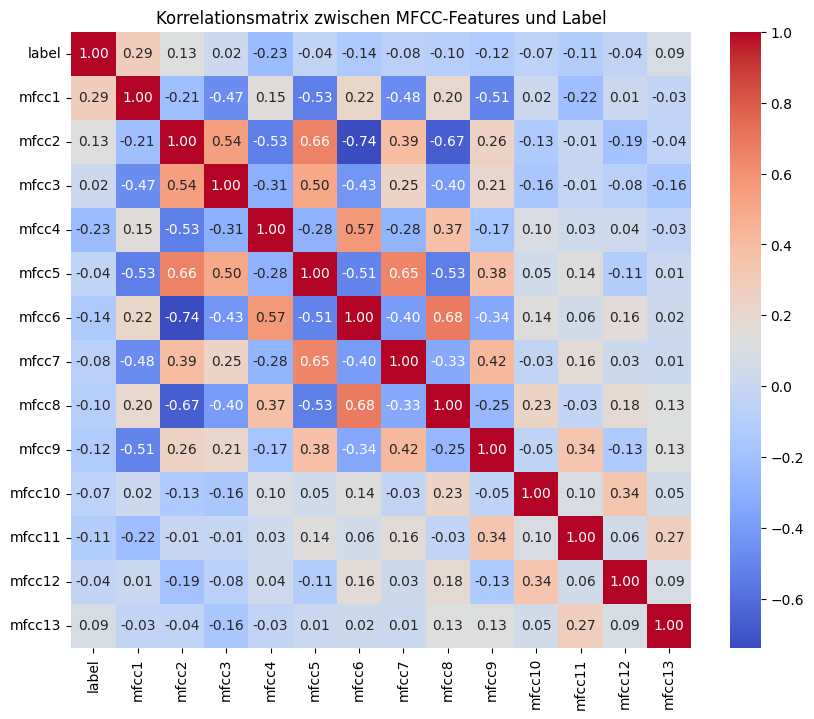

Korrelation jedes MFCC mit dem Label:
label     1.000000
mfcc1     0.286600
mfcc2     0.126608
mfcc13    0.088157
mfcc3     0.018333
mfcc12   -0.036784
mfcc5    -0.041098
mfcc10   -0.065724
mfcc7    -0.076284
mfcc8    -0.099192
mfcc11   -0.110343
mfcc9    -0.123525
mfcc6    -0.140329
mfcc4    -0.229943
Name: label, dtype: float64


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = combined_df.corr()

# Plot as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korrelationsmatrix zwischen MFCC-Features und Label")
plt.show()

# Optional: Show correlation of each MFCC with the label only
corr_with_label = corr_matrix['label'].sort_values(ascending=False)
print("Korrelation jedes MFCC mit dem Label:")
print(corr_with_label)

## 3.1 Interpretation der Korrelationsmatrix 
Wie in der Korrelationsmatrix zu erkennen ist, weisen die Merkmale mfcc12, mfcc3 und mfcc5 die geringste Korrelation mit dem Zielmerkmal auf. Die jeweiligen Korrelationswerte betragen:
$$
\begin{aligned}
\text{mfcc}_{12} &= \;\;-0.04 \\
\text{mfcc}_{3}  &= \;\;0.02 \\
\text{mfcc}_{5}  &= \;\;-0.04
\end{aligned}
$$
Da diese Werte sehr niedrig sind, tragen die genannten Merkmale kaum zur Vorhersage des Zielwerts bei. Um die Daten zu vereinfachen und mögliche Störfaktoren zu reduzieren, werden mfcc12, mfcc3 und mfcc5 daher aus dem Datensatz entfernt.

In [19]:
# Drop MFCC12, MFCC5, and MFCC3 from combined_df
combined_df = combined_df.drop(columns=['mfcc12', 'mfcc5', 'mfcc3'])

print("Remaining columns:", combined_df.columns)

Remaining columns: Index(['label', 'mfcc1', 'mfcc2', 'mfcc4', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9',
       'mfcc10', 'mfcc11', 'mfcc13'],
      dtype='object')


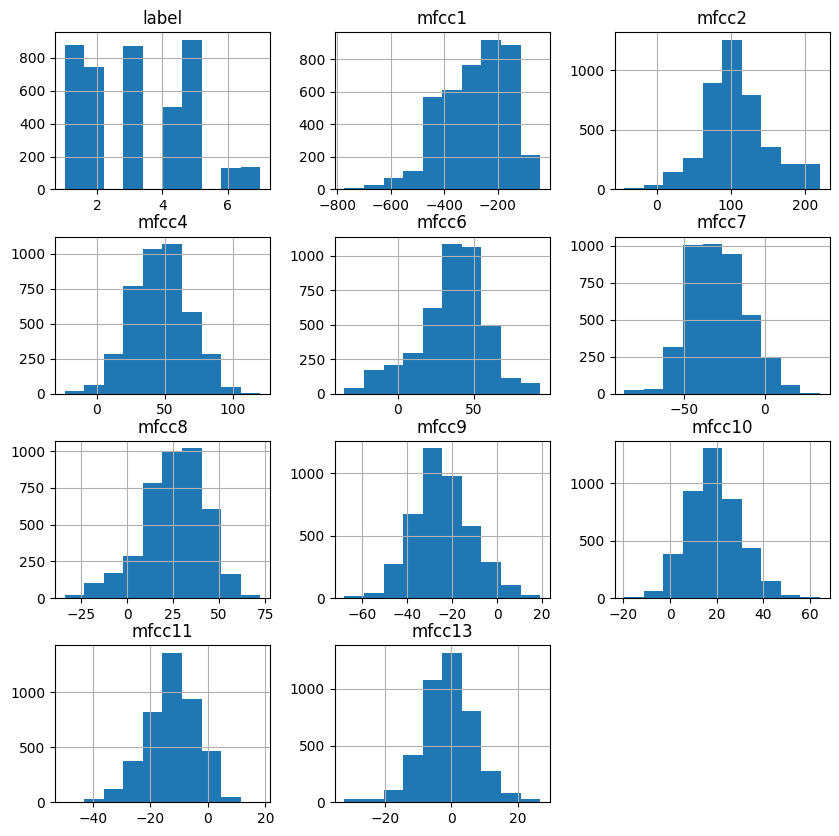

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'label' column is numeric (in case it's still a string)
combined_df['label'] = pd.to_numeric(combined_df['label'], errors='coerce')

# Plot histograms for all numeric columns
combined_df.hist(figsize=(10, 10))

# Save and show the plot
plt.show()

### 3.2 Beobachtungen und Anmerkungen zur Datenverteilung

Beim Betrachten der Histogramme fällt auf, dass die Labels 6 und 7 deutlich weniger Datenpunkte enthalten als die anderen Klassen. Diese Klassen entsprechen der elektrischen Schallzahnbürste (Label 7) und dem Nasen-, Ohren- und Augenbrauentrimmer (Label 6). Dieses Ungleichgewicht ist nachvollziehbar, da diese Geräte im Alltag seltener vorkommen und daher weniger häufig aufgenommen wurden.

Ein weiterer Punkt ist, dass die meisten MFCC-Merkmale eine annähernd normale Verteilung aufweisen. Das bedeutet, dass ihre Werte überwiegend um einen Mittelwert zentriert sind und nach beiden Seiten abfallen. Dies ist ein positives Merkmal, da viele statistische und maschinelle Lernverfahren mit normalverteilten Daten besonders gut arbeiten können.

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Columns and labels
label_cols = [c for c in df_encoded.columns if c.startswith('label_')]
feature_cols = [c for c in df_encoded.columns if c not in label_cols]

# Convert one-hot booleans to ints, then to label ids (1..K)
y_onehot = df_encoded[label_cols].astype(int).values
y_labels = y_onehot.argmax(axis=1) + 1

# Keep original row order (assumed chronological). 
df_work = df_encoded.reset_index(drop=True).copy()
df_work["y_label"] = y_labels

# Per-class chronological split: first 80% train, last 20% test
train_idx, test_idx = [], []
for lbl, grp in df_work.groupby("y_label", sort=True):
    n = len(grp)
    n_train = int(np.floor(0.8 * n))
    train_idx.extend(grp.index[:n_train].tolist())
    test_idx.extend(grp.index[n_train:].tolist())

X_train = df_work.loc[train_idx, feature_cols].values
X_test  = df_work.loc[test_idx,  feature_cols].values
y_train_onehot = df_work.loc[train_idx, label_cols].astype(int).values
y_test_onehot  = df_work.loc[test_idx,  label_cols].astype(int).values

# For sklearn classifiers we need integer class labels (0..K-1)
y_train_labels = y_train_onehot.argmax(axis=1)
y_test_labels  = y_test_onehot.argmax(axis=1)

# Scale features (fit on training only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


### 4. Aufteilung der Daten

In diesem Abschnitt werden die vorhandenen Audiodaten in verschiedene Teilmengen aufgeteilt. Dabei wird das Vorgehen zur Trennung in Trainings-, Validierungs- und Testdaten beschrieben. Im Rahmen dieser Aufteilung tritt ein spezifisches Problem auf, das im Folgenden erläutert wird. Anschließend wird eine geeignete Lösung zu diesem Problem vorgestellt und der Aufbau der entsprechenden Datenverarbeitungspipeline beschrieben, die zur Umsetzung dieser Lösung dient.

## 4.1 Problem:
Bei einer herkömmlichen zufälligen train_test_split-Aufteilung können zeitlich aufeinanderfolgende Datenpunkte aus derselben Aufnahme (also von derselben Maschine) sowohl im Trainings- als auch im Testdatensatz landen. Dadurch entsteht eine sogenannte Datenleckage, die zu einer künstlich hohen Genauigkeit führt. Das Modell erkennt dann nicht wirklich neue Daten, sondern ähnliche Ausschnitte aus demselben Signal.

## 4.2 Lösung:
Um dieses Problem zu vermeiden, wurde eine klassenweise chronologische Aufteilung der Daten durchgeführt. Für jede Klasse 
𝑘 wurde die ursprüngliche Reihenfolge der Daten beibehalten (angenommen als zeitliche Reihenfolge). Anschließend wurden die ersten 80 % der Daten jeder Klasse als Trainingsdaten und die letzten 20 % als Testdaten verwendet.
Dieses Vorgehen entspricht dem Prinzip „Trainiere auf früheren Segmenten und teste auf späteren Segmenten“ innerhalb jeder Klasse. Dadurch wird vermieden, dass nahezu identische aufeinanderfolgende Frames in beiden Datensätzen vorkommen.

## 4.3 Vorgehensweise (Pipeline):
Nach der Aufteilung wurden die Eingabedaten (Features) mit einem StandardScaler normalisiert. Dabei wurde der Skalierer ausschließlich auf den Trainingsdaten angepasst (fit) und anschließend auf die Testdaten angewendet (transform). Danach wurde ein RandomForestClassifier ohne Hyperparameter-Optimierung trainiert.
Zur Bewertung des Modells wurden die Gesamtgenauigkeit, ein Klassifikationsbericht (mit Präzision, Recall und F1-Score pro Klasse) sowie die Konfusionsmatrix erstellt.

## 4.4 Begründung:
Da aufeinanderfolgende Frames aus demselben Audiosignal häufig sehr ähnliche akustische Eigenschaften besitzen (z. B. Hintergrundgeräusche oder Betriebszustände), führt eine zufällige Aufteilung zu einer Überschneidung dieser Informationen. Durch die chronologische Aufteilung bleibt der Testdatensatz zeitlich vom Training getrennt, sodass das Modell tatsächlich generalisieren muss. Dies liefert ein realistischeres und wissenschaftlich fundierteres Fehlermaß.

## 4.5 Skalierung 
Bevor die Modelle trainiert werden, müssen die Eingabedaten skaliert werden. Da einige Merkmale deutlich größere Werte annehmen können als andere, würden sie das Modell sonst überproportional stark beeinflussen. Durch die Verwendung des Standard Scaler werden alle Merkmale so transformiert, dass sie einen Mittelwert von 0 und eine Standardabweichung von 1 besitzen. Dadurch erhalten alle Features das gleiche Gewicht, was zu einer stabileren und zuverlässigeren Modellleistung führt.

## 5. Modellierung

In dieser Arbeit werden vier verschiedene Klassifikationsansätze eingesetzt: K-Nearest Neighbors (KNN), Random Forest (RF), ein künstliches neuronales Netz (NN) sowie ein Ensemble-Modell. Ziel ist es, die Leistungsfähigkeit einzelner Modelle zu bewerten und anschließend durch Kombination mehrerer Ansätze die Gesamtgenauigkeit zu verbessern.

Für den KNN-Algorithmus wurde ein Hyperparameter-Tuning durchgeführt, um den optimalen Wert für die Anzahl der Nachbarn (k) zu bestimmen. Der Random Forest wurde ohne zusätzliches Tuning mit Standardparametern implementiert und diente als Vergleichsmodell.

Das neuronale Netz wurde mit der Adam-Optimierungsmethode (Lernrate 0,001) trainiert und verwendete als Verlustfunktion die Binary Crossentropy, da es sich um ein mehrklassiges Klassifikationsproblem mit One-Hot-Codierung der Zielvariablen handelt. Die Netzwerkarchitektur besteht aus drei Schichten: einer Eingabeschicht mit 64 Neuronen, einer verdeckten Schicht mit 32 Neuronen sowie einer Ausgabeschicht mit sieben Neuronen, die den Maschinenklassen entsprechen.

Zur Reduktion von Überanpassung wurde ein Dropout-Wert von 0,2 verwendet. Zusätzlich kam ein früher Abbruch (Early Stopping) über eine benutzerdefinierte Callback-Funktion zum Einsatz, die das Training automatisch beendet, sobald eine Validierungsgenauigkeit von 79 % erreicht wurde. Dieses Vorgehen gewährleistet eine effiziente Trainingsdauer bei gleichzeitig stabiler Modellleistung.

Abschließend wurden alle drei Modelle in einem Ensemble mit Hard Voting kombiniert, um deren individuelle Stärken zu nutzen und die Klassifikationsleistung weiter zu erhöhen. Dabei basiert die finale Entscheidung auf der Mehrheitsabstimmung der drei Einzelmodelle.

## 5.1 Random Forest

Ein einzelner Decision Tree kann je nach Datensatz eine hohe Varianz und damit eine schwankende Testgenauigkeit aufweisen. Um dieses Problem zu verringern, wird das Konzept des Random Forest verwendet.

Hierbei werden mehrere Decision Trees trainiert, wobei jeder Baum auf einem zufällig ausgewählten Teil des Datensatzes basiert. Diese zufällige Auswahl erfolgt durch Bootstrap Sampling, bei dem einzelne Datenpunkte mit Zurücklegen gezogen werden. Dadurch erhält jeder Baum leicht unterschiedliche Trainingsdaten und lernt somit unterschiedliche Muster.

Durch die Kombination vieler Bäume wird die Aussagekraft und Stabilität des Modells deutlich verbessert. Bei der Vorhersage treffen alle Bäume eine Entscheidung, und das endgültige Ergebnis basiert auf einer Mehrheitsentscheidung (Majority Vote) der einzelnen Trees.

Je mehr Bäume im Random Forest enthalten sind, desto robuster und verlässlicher wird in der Regel die Gesamtaussage des Modells.

Test Accuracy: 0.7945

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.69      0.74       176
           2       0.79      0.92      0.85       149
           3       0.71      0.75      0.73       175
           4       0.90      0.84      0.87       101
           5       0.95      0.96      0.95       182
           6       0.06      0.08      0.07        26
           7       0.86      0.43      0.57        28

    accuracy                           0.79       837
   macro avg       0.72      0.67      0.68       837
weighted avg       0.80      0.79      0.79       837



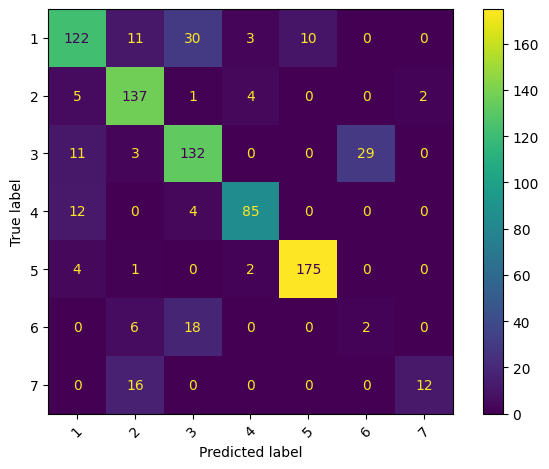


Counts per class (train/test):
   train  test
0    701   176
1    596   149
2    699   175
3    402   101
4    728   182
5    103    26
6    108    28


In [ ]:
#  Train a no-tuning Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train_labels)

# Evaluate 
y_pred = rf.predict(X_test_scaled)
acc = (y_pred == y_test_labels).mean()
print(f"Test Accuracy: {acc:.4f}")

# Class names from one-hot columns (e.g., '1','2',...,'7')
class_names = [c.replace('label_', '') for c in label_cols]

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred, target_names=class_names))

cm = confusion_matrix(y_test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45)
plt.tight_layout()
plt.show()

# sanity check: how many per class made it into train/test?
print("\nCounts per class (train/test):")
train_counts = pd.Series(y_train_labels).value_counts().sort_index()
test_counts  = pd.Series(y_test_labels).value_counts().sort_index()
print(pd.DataFrame({"train": train_counts, "test": test_counts}))

## 5.1.1 Ergebnisse und Diskussion
Die Daten wurden von etwa 13 bis 15 Personen aufgenommen. Jede Person hatte die Möglichkeit, ein oder mehrere Geräte über einen Zeitraum von bis zu zwei Minuten aufzuzeichnen. Das führte jedoch zu einem Problem: Viele Teilnehmende entschieden sich dafür, nur ein Gerät über die gesamten zwei Minuten zu erfassen.

Dadurch entstanden viele sehr ähnliche Datenpunkte, was zu Datenleckage zwischen Trainings- und Testdaten führte. Obwohl geeignete Maßnahmen zur Reduzierung dieses Effekts umgesetzt wurden, bleibt der Einfluss deutlich sichtbar. Das zeigt sich daran, dass das Random-Forest-Modell auf den Testdaten immer noch eine Genauigkeit von rund 80 % erreicht – ein Wert, der aufgrund der begrenzten Datenvielfalt unrealistisch hoch ist.

In zukünftigen Arbeiten sollte daher die Anzahl der aufgenommenen Geräte erhöht und gleichzeitig die Aufnahmezeit pro Gerät reduziert werden. Auf diese Weise ließe sich die Datenvielfalt verbessern und die Überlappung zwischen Trainings- und Testdaten verringern, was zu realistischeren und aussagekräftigeren Ergebnissen führen würde.

## 5.1.2 Analyse der Konfusionsmatrix und Modellschwächen

Die dargestellte Konfusionsmatrix zeigt die Vorhersageleistung des Random-Forest-Modells für die sieben Klassen. Insgesamt erreicht das Modell eine Genauigkeit von etwa 79 %, was auf den ersten Blick gut erscheint, jedoch teilweise durch verbleibende Datenüberschneidungen (Data Leakage) beeinflusst ist.

## 5.1.3 Stärken des Modells:
Die Klassen 2, 3, 4 und 5 wurden vom Modell mit hoher Präzision und Trefferquote erkannt. Besonders Klasse 5 weist nahezu perfekte Ergebnisse auf. Diese Klassen verfügen vermutlich über deutlich unterscheidbare akustische Merkmale (z. B. charakteristische MFCC-Muster), wodurch sie leichter zu identifizieren sind.

## 5.1.4 Schwächen des Modells:
Auffällig ist, dass Klasse 1 häufig mit Klasse 3 verwechselt wurde. Ebenso kam es bei den Klassen 6 und 7 zu vielen Fehlklassifikationen. Diese beiden Klassen weisen eine geringe Trefferquote auf, was auf eine ungleiche Verteilung der Daten sowie zu wenige Trainingsbeispiele hinweist. Zudem ähneln sich die akustischen Eigenschaften mancher Geräte, was zu Überschneidungen in den Merkmalen führt.

Trotz der chronologischen Aufteilung der Daten bleibt ein gewisser Einfluss der langen Einzelaufnahmen bestehen. Da einige Geräte über zwei Minuten hinweg aufgezeichnet wurden, enthält der Datensatz viele sehr ähnliche Sequenzen. Das Modell konnte dadurch wiederkehrende Muster „auswendig lernen“, anstatt generalisierbare Merkmale zu erkennen.

## 5.1.5 Zusammenfassung:
Die Hauptschwächen des Modells liegen in der Verwechslung ähnlicher Klassen, der geringen Erkennungsleistung bei seltenen Klassen und der begrenzten Datenvielfalt. Für zukünftige Arbeiten sollte die Anzahl der Geräte erhöht und die Aufnahmedauer pro Gerät reduziert werden, um eine größere Variabilität und eine realistischere Bewertung der Modellleistung zu erreichen.

## 5.2 K-Nearest Neighbor (KNN)

Der K-Nearest Neighbor (KNN) Algorithmus gehört zu den einfachsten Methoden des maschinellen Lernens. Er funktioniert nach dem Prinzip, dass das Modell die Trainingsdaten speichert und daraus lernt, indem es Ähnlichkeiten zwischen Datenpunkten erkennt.

Bei der Vorhersage eines neuen (unbekannten) Datenpunkts betrachtet KNN diesen Punkt im mehrdimensionalen Merkmalsraum und sucht die K nächsten Nachbarn aus dem Trainingssatz. Diese Nachbarn sind die Datenpunkte, die dem neuen Punkt am ähnlichsten sind.

Die Anzahl der Nachbarn, also K, sollte ungerade gewählt werden, um Gleichstände zu vermeiden. Wenn zum Beispiel K = 5 ist und 3 Nachbarn zu Klasse A gehören, während 2 Nachbarn zu Klasse B gehören, wird der neue Punkt der Klasse A zugeordnet.

Ein Nachteil von KNN ist, dass das Modell den gesamten Trainingsdatensatz im Speicher behalten muss. Dadurch kann es bei sehr großen Datensätzen langsam und speicherintensiv werden.

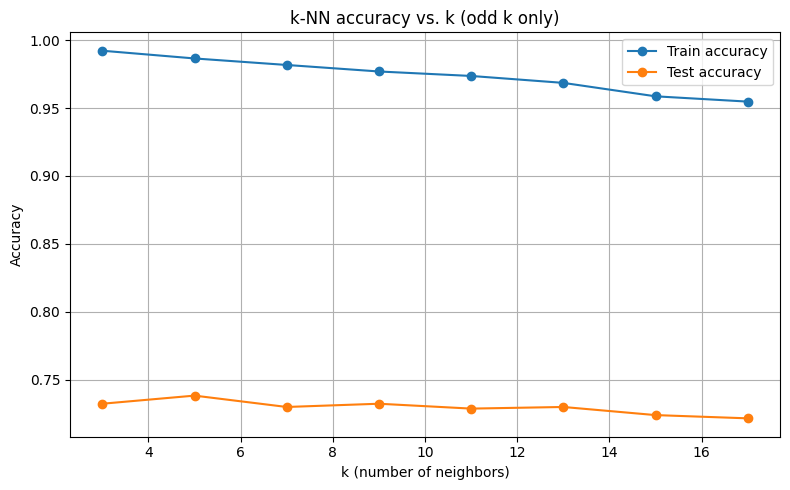

Best k: 5 | Test accuracy: 0.7384 | Train accuracy: 0.9865

Classification report (best k):
              precision    recall  f1-score   support

           1       0.76      0.73      0.74       176
           2       0.76      0.75      0.75       149
           3       0.67      0.57      0.61       175
           4       0.90      0.97      0.93       101
           5       0.95      0.91      0.93       182
           6       0.05      0.12      0.07        26
           7       0.40      0.43      0.41        28

    accuracy                           0.74       837
   macro avg       0.64      0.64      0.64       837
weighted avg       0.77      0.74      0.75       837



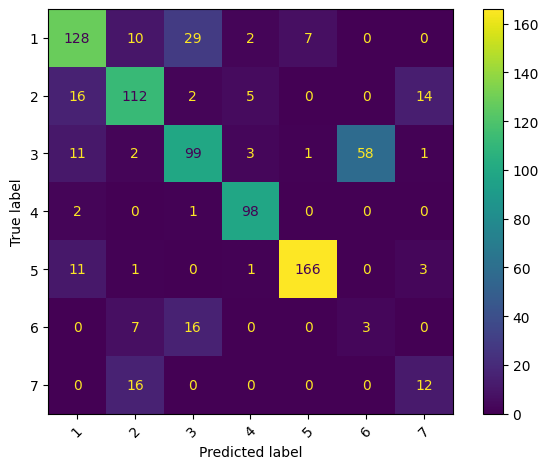

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# sweep k from 3 to 17, only odd numbers
k_values = list(range(3, 18, 2))  # 3, 5, 7, 9, 11, 13, 15, 17
train_acc, test_acc = [], []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_labels)
    # accuracies
    train_acc.append(knn.score(X_train_scaled, y_train_labels))
    y_pred = knn.predict(X_test_scaled)
    test_acc.append(accuracy_score(y_test_labels, y_pred))

# visualize accuracy over k 
plt.figure(figsize=(8,5))
plt.plot(k_values, train_acc, marker='o', label='Train accuracy')
plt.plot(k_values, test_acc, marker='o', label='Test accuracy')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.title('k-NN accuracy vs. k (odd k only)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# pick best k by test accuracy 
best_idx = int(np.argmax(test_acc))
best_k = k_values[best_idx]
print(f"Best k: {best_k} | Test accuracy: {test_acc[best_idx]:.4f} | Train accuracy: {train_acc[best_idx]:.4f}")

# refit best model and report 
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train_labels)
y_pred_best = best_knn.predict(X_test_scaled)

# class names from one-hot columns
class_names = [c.replace('label_', '') for c in label_cols]

print("\nClassification report (best k):")
print(classification_report(y_test_labels, y_pred_best, target_names=class_names))

cm = confusion_matrix(y_test_labels, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45)
plt.tight_layout()
plt.show()


## 5.2.1 Interpretation der KNN Ergebnisse
Bei der Modellierung mit K-Nearest Neighbor (KNN) war eine kleine Hyperparameter-Optimierung notwendig. Das Modell wurde mit verschiedenen Werten von k getestet, beginnend bei 3 bis 17 in Schritten von 2. Dadurch sollte ermittelt werden, bei welcher Nachbarzahl das Modell die beste Leistung erzielt.

Der Wert k = 5 lieferte die höchste Testgenauigkeit, während sich die Trainingsgenauigkeit im Vergleich dazu kaum veränderte. Dieses Verhalten ist typisch, da das Modell die Trainingsdaten bereits kennt und dort meist eine höhere Genauigkeit erzielt.

Die Konfusionsmatrix für 𝑘=5 zeigt, dass das Modell einige Klassen verwechselt hat. Beispielsweise wurde Label 1 insgesamt 29 Mal als Label 3 erkannt, Label 6 16 Mal als Label 3, und Label 7 16 Mal als Label 2 klassifiziert.

Insgesamt ist die Aussagekraft des KNN-Modells geringer als beim Random-Forest-Modell, da KNN empfindlicher auf Datenverteilungen und Skalierungen reagiert. Dennoch erreicht das Modell eine solide Testgenauigkeit von etwa 74 %, was für diese Art von Datensatz ein gutes Ergebnis darstellt.

## 5.3 Neuronales Netz (Modellierung und Trainingsprinzip)

Jedes Neuron im Netzwerk ist mit einer ReLU-Aktivierungsfunktion ausgestattet.
Die ReLU-Funktion (Rectified Linear Unit) gibt nur positive Werte weiter und setzt alle negativen Werte auf null.
Dadurch werden unwichtige oder verrauschte Signale im Datensatz abgeschwächt, während relevante Muster hervorgehoben werden.
Es wurde auch Leaky ReLU getestet, da einige MFCC-Werte negativ sind, jedoch führte diese Variante zu keinen besseren Ergebnissen.
Daher wurde schließlich ReLU verwendet, vermutlich weil sie das Rauschen besser gefiltert hat.

Die inneren Schichten (Hidden Layers) nutzen also ReLU, während die Ausgabeschicht eine Sigmoid-Funktion verwendet.
Die Sigmoid-Funktion gibt für jede Klasse einen Wert zwischen 0 und 1 aus, also eine Art „Wahrscheinlichkeit“, wie stark ein Signal zu einer bestimmten Klasse gehört.
Da es sich hier um ein binäres Klassifikationsproblem mit One-Hot-Codierung handelt, wird als Fehlerfunktion (Loss Function) die Binary Cross Entropy verwendet.

Diese berechnet, wie stark die vorhergesagten Wahrscheinlichkeiten $p_i$ von den tatsächlichen Werten $y_i$ abweichen:
$$
L_{\text{total}} = -\frac{1}{7} \sum_{i=1}^{7} \left[ y_i \log(p_i) + (1 - y_i)\log(1 - p_i) \right]
$$
Wenn der Fehler groß ist, bedeutet das, dass die Vorhersage weit vom wahren Wert entfernt ist.
Das Modell passt daraufhin seine Gewichte (Parameter) an, um den Fehler zu verringern.
Dieser Prozess nennt sich Gradient Descent.


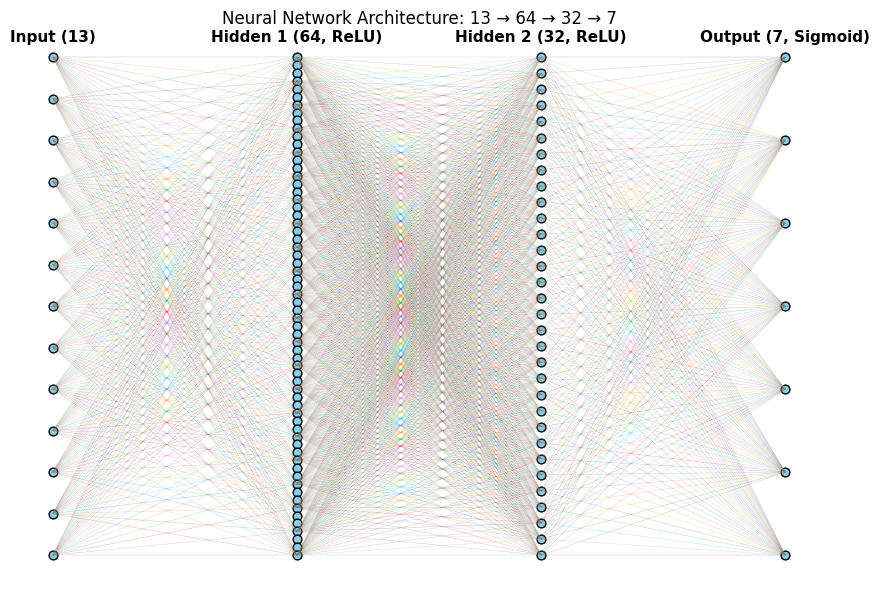

In [33]:
import matplotlib.pyplot as plt
import numpy as np

layer_sizes = [13, 64, 32, 7]
labels = ["Input (13)", "Hidden 1 (64, ReLU)", "Hidden 2 (32, ReLU)", "Output (7, Sigmoid)"]

fig, ax = plt.subplots(figsize=(9, 6))
ax.axis('off')

x = np.arange(len(layer_sizes))
ymax = max(layer_sizes)

for i, size in enumerate(layer_sizes):
    ys = np.linspace(ymax, 0, size)
    ax.scatter(np.full(size, x[i]), ys, s=40, color='skyblue', edgecolor='k')
    ax.text(x[i], ymax + 2, labels[i], ha='center', fontsize=11, weight='bold')

    if i < len(layer_sizes) - 1:
        ys_next = np.linspace(ymax, 0, layer_sizes[i+1])
        for y1 in ys[::max(1, len(ys)//20)]:
            for y2 in ys_next[::max(1, len(ys_next)//20)]:
                ax.plot([x[i], x[i+1]], [y1, y2], linewidth=0.3, alpha=0.4)

plt.title("Neural Network Architecture: 13 → 64 → 32 → 7", fontsize=12)
plt.tight_layout()
plt.show()


## 5.3.1 Ablauf des Lernprozesses
$$
\text{Learning} \\
\;\;\xrightarrow{\text{Training}}\;\;
\text{Prediction} 
\;\;\xrightarrow{\text{Sigmoid-Funktion}}\;\;
\text{Fault Calculation} 
\;\;\xrightarrow{\text{Binary Cross Entropy}}\;\;
\text{Fault Minimization} 
\;\;\xrightarrow{\text{Gradient Descent}}\;\;
\text{Nächste Epoche}
$$

## 1-Learning (Lernen):
Das Modell durchläuft die Trainingsdaten und passt seine Parameter an, um Muster zu erkennen.

## 2-Prediction (Vorhersage):
Für neue Datenpunkte wird eine Vorhersage gemacht – die Ausgabe wird durch die Sigmoid-Funktion in Wahrscheinlichkeiten umgewandelt.

## 3-Fault Calculation (Fehlerberechnung):
Der Unterschied zwischen Vorhersage und tatsächlichem Label wird mit der Binary Cross Entropy berechnet.

## 4-Fault Minimization (Fehleranpassung):
Wenn der Fehler groß ist, werden die Gewichte durch Gradient Descent so verändert, dass der Fehler kleiner wird.

## 5-Nächste Epoche:
Der Prozess wiederholt sich über viele Epochen, bis der Fehler minimal ist und das Modell stabil lernt.

## 5.3.2 Bemerkung
Um Überanpassung (Overfitting) zu vermeiden, wurde das Training automatisch gestoppt, sobald eine Validierungsgenauigkeit von 79 % erreicht wurde.
Dies stellt sicher, dass das Modell nicht nur die Trainingsdaten „auswendig lernt“, sondern auch auf neue, unbekannte Daten gut reagiert.

Epoch 1/50


C:\Users\muayi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2918 - loss: 0.5829 - val_accuracy: 0.6069 - val_loss: 0.3017
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5882 - loss: 0.2990 - val_accuracy: 0.6667 - val_loss: 0.2209
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6699 - loss: 0.2403 - val_accuracy: 0.6977 - val_loss: 0.2054
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7203 - loss: 0.2008 - val_accuracy: 0.6834 - val_loss: 0.2004
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7609 - loss: 0.1817 - val_accuracy: 0.6822 - val_loss: 0.2008
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7823 - loss: 0.1652 - val_accuracy: 0.6882 - val_loss: 0.2004
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8021 - loss: 0.1532 - val_accuracy: 0.6894 - val_loss: 0.2027
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8165 - loss: 0.1418 - val_accuracy: 0.7073 - val_

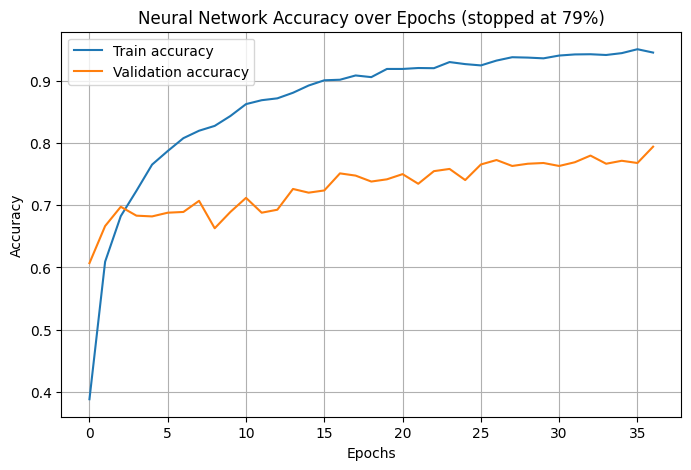

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

#  Custom callback to stop at target validation accuracy 
class TargetAccuracy(Callback):
    def __init__(self, target=0.79):
        super().__init__()
        self.target = target

    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs.get('val_accuracy')
        if val_acc is not None and val_acc >= self.target:
            print(f"\nReached {self.target*100:.0f}% validation accuracy, stopping training.")
            self.model.stop_training = True

#  Model definition 
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(7, activation='sigmoid')  # 7 outputs for 7 one-hot encoded labels
])

#  Compile the model 
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

#  Train the model with early stop at 79% 
target_callback = TargetAccuracy(target=0.79)

history = model.fit(
    X_train_scaled,
    y_train_onehot,
    validation_data=(X_test_scaled, y_test_onehot),
    epochs=50,
    batch_size=32,
    callbacks=[target_callback],
    verbose=1
)

#  Evaluate 
loss, acc = model.evaluate(X_test_scaled, y_test_onehot, verbose=0)
print(f"\nTest accuracy: {acc:.4f}")

#  Plot training history 
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Neural Network Accuracy over Epochs (stopped at 79%)')
plt.legend()
plt.grid(True)
plt.show()


## 5.3.3 Erklärung der Ergebnise 

Während des Trainings erreichte die Trainingsgenauigkeit nach einer bestimmten Anzahl von Epochen ein Plateau, d. h. sie stieg nicht weiter an. Gleichzeitig zeigte die Validierungsgenauigkeit (Testdaten) weiterhin leichte Verbesserungen. Um Overfitting zu vermeiden, also das Überanpassen des Modells an die Trainingsdaten, wurde eine Frühstopp-Bedingung implementiert.

Das Training wurde automatisch beendet, sobald eine Validierungsgenauigkeit von 79 % erreicht wurde. Die maximale Anzahl der Epochen war ursprünglich auf 50 festgelegt, jedoch wurde das Training bereits nach 38 Epochen gestoppt.

Dieses Verhalten zeigt, dass das Modell den Lernprozess rechtzeitig beendet hat, bevor es begann, unnötig komplexe Muster aus den Trainingsdaten zu lernen, die keine Verbesserung für unbekannte Daten gebracht hätten.

## 5.4 Ensemble-Modell (Hard Voting)
In diesem Ansatz wurden drei Modelle kombiniert: Random Forest (rf), k-Nearest Neighbors (knn) und das Neuronale Netz (model).
Dabei wurde das sogenannte Hard Voting verwendet. Jedes Modell gibt eine „Stimme“ für eine Klasse ab, und die Klasse mit den meisten Stimmen wird als Endergebnis gewählt.

Um die unterschiedlichen Leistungen der Modelle zu berücksichtigen, wurden Gewichte vergeben:
$$
RF = 3, \quad NN = 3, \quad kNN = 2
$$

Das bedeutet, dass die Vorhersagen des Random-Forest- und des Neuronalen-Netz-Modells etwas stärker gewichtet wurden, da sie einzeln eine höhere Genauigkeit erzielt haben.

Durch diese Kombination entsteht ein robusteres und stabileres Modell, da einzelne Fehlklassifikationen weniger Einfluss auf das Gesamtergebnis haben.
Das Ensemble erreichte eine Genauigkeit von 83 %, was zeigt, dass sich die Kombination der Modelle positiv auf die Gesamtleistung ausgewirkt hat.

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

 Ensemble Test Accuracy: 0.8363

Classification Report (Ensemble):
              precision    recall  f1-score   support

           1       0.85      0.75      0.80       176
           2       0.81      0.91      0.85       149
           3       0.75      0.83      0.79       175
           4       0.89      0.96      0.92       101
           5       0.97      0.97      0.97       182
           6       0.13      0.08      0.10        26
           7       0.80      0.43      0.56        28

    accuracy                           0.84       837
   macro avg       0.74      0.70      0.71       837
weighted avg       0.83      0.84      0.83       837



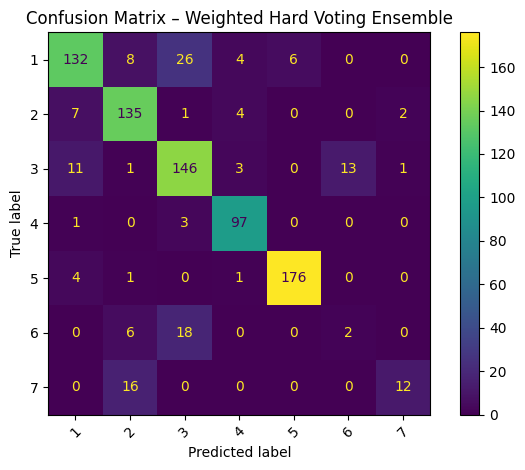

In [38]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#  Individual model predictions 
rf_pred   = rf.predict(X_test_scaled)
knn_pred  = best_knn.predict(X_test_scaled)

# For neural network (model), get probabilities and then class indices
nn_pred_prob = model.predict(X_test_scaled)
nn_pred = np.argmax(nn_pred_prob, axis=1)

#  Weighted voting setup 
weights = {'rf': 3, 'nn': 3, 'knn': 2}

#  Combine predictions into a single matrix 
pred_matrix = np.vstack([
    np.repeat(rf_pred[np.newaxis, :], weights['rf'], axis=0),
    np.repeat(nn_pred[np.newaxis, :], weights['nn'], axis=0),
    np.repeat(knn_pred[np.newaxis, :], weights['knn'], axis=0)
])

#   Hard voting (majority decision per sample) 
ensemble_pred = np.apply_along_axis(
    lambda x: np.bincount(x, minlength=7).argmax(),  # 7 classes
    axis=0,
    arr=pred_matrix
)

#   Evaluate ensemble performance 
ensemble_acc = accuracy_score(y_test_labels, ensemble_pred)
print(f"\n Ensemble Test Accuracy: {ensemble_acc:.4f}")

print("\nClassification Report (Ensemble):")
print(classification_report(y_test_labels, ensemble_pred, target_names=class_names))

cm = confusion_matrix(y_test_labels, ensemble_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix – Weighted Hard Voting Ensemble")
plt.tight_layout()
plt.show()



## 6. Diskussion und Fazit

Das Ziel dieser Arbeit bestand darin, ein KI-basiertes System zu entwickeln, das verschiedene Maschinen anhand ihrer Geräusche zuverlässig klassifizieren kann. Insgesamt konnte dieses Ziel weitgehend erreicht werden. Die entwickelten Modelle zeigten, dass maschinelles Lernen auf Grundlage akustischer Merkmale wie MFCCs grundsätzlich in der Lage ist, Maschinenklassen mit hoher Genauigkeit zu unterscheiden.

Das Random-Forest-Modell erzielte mit etwa 79–80 % Testgenauigkeit bereits solide Ergebnisse, die durch das abschließende Ensemble-Modell (Hard Voting) nochmals verbessert werden konnten. Mit einer kombinierten Genauigkeit von 83 % wurde die Leistungsfähigkeit der gewählten Ansätze bestätigt. Besonders Klassen mit klar unterscheidbaren akustischen Merkmalen konnten sehr präzise erkannt werden, was die Wirksamkeit der Merkmalsextraktion und der Modellarchitektur unterstreicht.

Gleichzeitig traten jedoch mehrere Limitationen auf. Aufgrund der begrenzten Datenmenge und der geringen Variabilität innerhalb der Aufnahmen kam es zu Datenleckage, da viele Teilnehmende nur ein Gerät über den gesamten Zeitraum von zwei Minuten aufzeichneten. Dadurch ähnelten sich viele Datenpunkte stark, was die Generalisierungsfähigkeit der Modelle einschränkte. Zudem zeigte sich, dass einige Geräte derselben Klasse deutlich unterschiedliche Geräuschprofile aufweisen. Dies führte dazu, dass das Modell innerhalb einzelner Klassen inkonsistente Ergebnisse erzielte.

Die gewählten Modellansätze wiesen dennoch unterschiedliche Stärken auf: KNN war einfach und nachvollziehbar, lieferte jedoch geringere Genauigkeit, Random Forest zeigte robuste Ergebnisse mit geringem Tuning-Aufwand und das neuronale Netz ermöglichte eine flexible Modellierung komplexer Zusammenhänge. Das Ensemble nutzte schließlich die Stärken aller Modelle und erwies sich als der leistungsstärkste Ansatz.

Für zukünftige Arbeiten wird eine deutlich größere und diversere Datenbasis empfohlen. Eine größere Anzahl unterschiedlicher Geräte pro Klasse sowie kürzere und vielfältigere Aufnahmen würden die Robustheit und Generalisierungsfähigkeit des Modells erheblich verbessern. Ergänzend könnten fortgeschrittene Deep-Learning-Modelle, wie Convolutional oder Recurrent Neural Networks, eingesetzt werden, um zeitliche und spektrale Muster besser zu erfassen.

Zusammenfassend lässt sich festhalten, dass das Projekt die prinzipielle Machbarkeit einer akustischen Maschinenklassifikation erfolgreich demonstriert hat. Trotz bestehender Einschränkungen bilden die erzielten Ergebnisse eine solide Grundlage für weiterführende Untersuchungen und Optimierungen im Bereich der intelligenten Geräuscherkennung.